In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import XGboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
warnings.filterwarnings("ignore")


ModuleNotFoundError: No module named 'XGboost'

In [4]:

!pip install XGboost 

In [5]:
!pip install lightgbm

In [3]:
data = pd.read_csv('bank.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [5]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


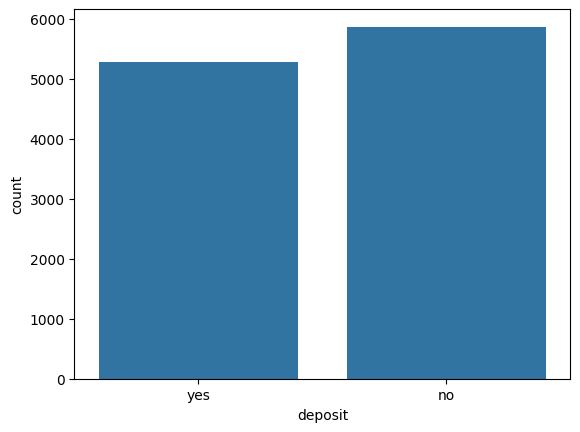

In [7]:
# Check the distribution of target variable 'deposit'
sns.countplot(x='deposit', data=data)
plt.show()

In [9]:
# Handle Missing Value
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [10]:

# Data Preprocessing
# Convert categorical features using OneHotEncoder
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numerical_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

In [11]:

# Split the data into features (X) and target (y)
X = data.drop('deposit', axis=1)
y = data['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

In [12]:

# Preprocess categorical features (OneHot Encoding)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [14]:
# 1. Logistic Regression
logreg = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression())])
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression")
print(classification_report(y_test, y_pred_logreg))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_logreg))

Logistic Regression
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1762
           1       0.83      0.80      0.81      1587

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349

AUC-ROC: 0.8250546973959104


In [15]:
# 2. Decision Tree Classifier
dtree = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier())])
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)
print("Decision Tree")
print(classification_report(y_test, y_pred_dtree))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_dtree))

Decision Tree
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1762
           1       0.76      0.74      0.75      1587

    accuracy                           0.77      3349
   macro avg       0.77      0.77      0.77      3349
weighted avg       0.77      0.77      0.77      3349

AUC-ROC: 0.766776311789819


In [16]:
# 3. Random Forest Classifier
rf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier())])
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest")
print(classification_report(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_rf))

Random Forest
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1762
           1       0.83      0.87      0.85      1587

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349

AUC-ROC: 0.8517970571048681


In [18]:
# Hyperparameter Tuning using GridSearchCV for RandomForest
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30]
}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)
print(f"Best params for RandomForest: {grid_rf.best_params_}")
y_pred_rf_tuned = grid_rf.predict(X_test)
print("Tuned Random Forest")
print(classification_report(y_test, y_pred_rf_tuned))

Best params for RandomForest: {'classifier__max_depth': 20, 'classifier__n_estimators': 200}
Tuned Random Forest
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1762
           1       0.82      0.88      0.85      1587

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349



In [19]:
# 4. Boosting Algorithms
# AdaBoost
ada = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', AdaBoostClassifier())])
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
print("AdaBoost")
print(classification_report(y_test, y_pred_ada))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_ada))

d:\anaconda\envs\BIA\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1762
           1       0.83      0.79      0.81      1587

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

AUC-ROC: 0.820232779528905


In [20]:
# Gradient Boosting
gboost = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', GradientBoostingClassifier())])
gboost.fit(X_train, y_train)
y_pred_gboost = gboost.predict(X_test)
print("Gradient Boosting")
print(classification_report(y_test, y_pred_gboost))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_gboost))

Gradient Boosting
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1762
           1       0.83      0.85      0.84      1587

    accuracy                           0.84      3349
   macro avg       0.84      0.84      0.84      3349
weighted avg       0.84      0.84      0.84      3349

AUC-ROC: 0.8445841174068249


In [8]:
#Xgboost
xgboost = Pipeline(steps=[('preprocessor', preprocessor), ('classifier',  xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'))])
xgboost.fit(X_train,y_train)
y_pred_xgboost = xgboost.predict(X_test)
print("xgBoost")
print(classification_report(y_test, y_pred_xgboost))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_xgboost))

NameError: name 'preprocessor' is not defined

In [3]:
# LightGBM
lgbm = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', lgb.LGBMClassifier())])
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)
print("LightGBM")
print(classification_report(y_test, y_pred_lgbm))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_lgbm))

NameError: name 'preprocessor' is not defined

In [44]:

# Model Comparison based on AUC-ROC
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'XGBoost', 'LightGBM']
roc_scores = [
    roc_auc_score(y_test, y_pred_logreg),
    roc_auc_score(y_test, y_pred_dtree),
    roc_auc_score(y_test, y_pred_rf),
    roc_auc_score(y_test, y_pred_ada),
    roc_auc_score(y_test, y_pred_gboost),
    roc_auc_score(y_test, y_pred_xgboost),
    roc_auc_score(y_test, y_pred_lgbm)
]

NameError: name 'y_pred_xgboost' is not defined

In [45]:

# Plot AUC-ROC comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=roc_scores)
plt.title('Model Comparison based on AUC-ROC')
plt.ylabel('AUC-ROC Score')
plt.xticks(rotation=45)
plt.show()

NameError: name 'roc_scores' is not defined

<Figure size 1000x600 with 0 Axes>